# V. Functions and Plotting

Functions are routines that are general and applicable to many problems. As we've already seen, Matlab has numerous built-in functions you can use. In this notebook, we'll go over how to write your own functions. We'll also see how to create basic plots in Matlab.

To define a Matlab function:

* Decide on a name for your function. Be sure that the name you choose does not conflict with the name of a function already used in Matlab.
* Document the function, i.e. add comments that describe what the function does, what arguments it accepts, what it returns.
* The first line in your function should have this format: <br />
`function [list of outputs] = functionname(list of inputs)`
* Save the function as a m-file. You should give the m-file the same name as functionname.
* In your Matlab code call the function by its file name. For this reason you should give the m-file the same name as the function name.

Suppose we want to define a function to calculate the $l_{p}$ norm of a vector __x__ of length n:
$$\Big(\sum_{i=1}^{n} \left|x_{i}\right|^{p}\Big)^{\frac{1}{p}} $$

So the user passes a vector of length n and the value of p (where p is an integer) into the function and the function will compute the above quantity and return the scalar result. Suppose we want to call the function *mylpnorm*. The first line of the function will be:

`function [result] = mylpnorm(x,p)`

However we need to write some Matlab code to compute the desired result. So the function will look like:

In [ ]:
function [result] = mylpnorm(x,p)
  result = (sum(abs(x).^p)) ^ (1/p)
end

In [1]:
%Create a vector x and set p to 2 to test the function
v = [1 -2 3 4 -1];
q = 3;

w = mylpnorm(v,q)


w =

    4.6570



Note that we could've also written the above function using a for loop:

In [ ]:
function [result] = mylpnorm2(x,p)
  result = 0
  for j = 1:length(x)
    result = result + (abs(x(j))^p
  end
result = result ^ 1/p
end

In [2]:
w = mylpnorm2(v,q)


w =

    4.6570



However the former version of the function will be much faster as a simple timing test using __tic__ and __toc__ shows:

In [3]:
y = randn(1,11^5);

tic 
mylpnorm(y,3);
toc

tic
mylpnorm2(y,3);
toc

Elapsed time is 0.010725 seconds.
Elapsed time is 0.023127 seconds.


The former version of the function uses "vectorization"; in general __for__ loops in Matlab can be slow and when possible you'll want to find an alternative to using them. As stated before, we should add some comments to the function to document the function:

In [ ]:
function [result] = mylpnorm(x,p)
% Function to calculate the lp norm of a vector
% Input: x (vector), p (scalar integer)
% Output: result

  result = (sum(abs(x).^p))^(1/p)
end

The function works as before, but by inserting comments you can now use __help__ on your function to get a description of the function.

In [4]:
help mylpnorm

  Function to calculate the lp norm of a vector
  Input: x (vector), p (scalar integer)
  Output: result



It can be helpful to include various forms of argument checking into your function. That is, in case the user calls the function using inappropriate arguments you can have the function throw an informative error.

For example, we know that our *mylpnorm* function requires two input arguments, so if the function is not called with two input arguments we can have it throw an error message to the screen. In Matlab you can do this by using the *narginchk* function.

In [ ]:
function [result] = mylpnorm(x,p)
% Function to calculate the lp norm of a vector
% Input: x (vector), p (scalar integer)
% Output: result
  narginchk(2,2)
  result = (sum(abs(x).^p))^(1/p)
end

In [5]:
mylpnorm(v)

Error using mylpnorm
Not enough input arguments.



We may also want to make sure that the correct types of arguments are passed into the function. For example, we may want to ensure that our function *mylpnorm* is only used to calculate the norm of a one dimensional vector. In this case, we'd have our function check the dimension of the __x__ argument, throw an error if __x__ is anything other than a vector, and stop execution. We can do all this using an __if__ statment along with the __error__ function.

In [ ]:
function [result] = mylpnorm(x,p)
% Function to calculate the lp norm of a vector
% Input: x (vector), p (scalar integer)
% Output: result
  narginchk(2,2)
  sz = size(x)
  if (length(sz) == 2) && (sz(1) == 1 || sz(2) == 1)
    result = (sum(abs(x).^p))^(1/p)
  else
    msg = 'The first argument needs to be a one dimensional vector';
    error(msg)
  end
end

In [6]:
A = [1 2; 3 4];

mylpnorm(A,3)

Error using mylpnorm
The first argument needs to be a one dimensional vector



The last thing we'll cover is how to do some basic plotting in Matlab which will involve using Matlab's built-in __plot__ function. Let's first consider how to do a simple line plot.

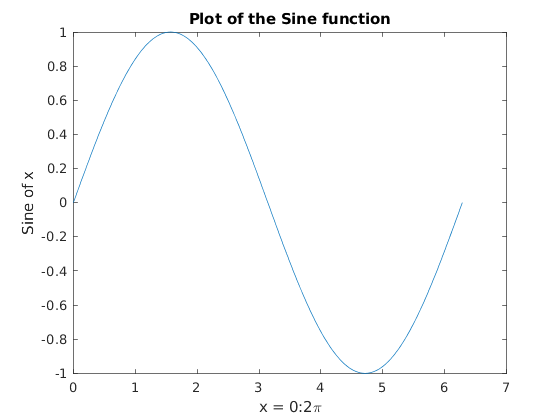

In [7]:
%generate some data
x = 0 : pi/100 : 2*pi;
y = sin(x);

%construct the plot
plot(x,y)

%add some axis labels and a title
xlabel('x = 0:2\pi')
ylabel('Sine of x')
title('Plot of the Sine function')

You can also do multiline plots pretty easily.

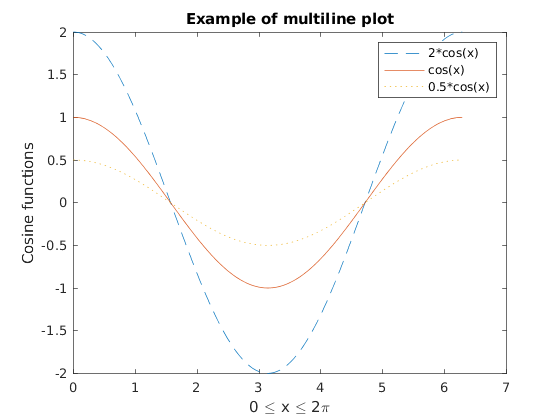

In [8]:
%generate some data
x = 0: pi/100: 2*pi;
y1 = 2 * cos(x);
y2 = cos(x);
y3 = 0.5*cos(x);

%construct the plot
plot(x, y1, '--', x, y2,'-', x, y3, ':')

%add some features to the plot
xlabel('0 \leq x \leq 2\pi')
ylabel('Cosine functions')
legend('2*cos(x)','cos(x)','0.5*cos(x)')
title('Example of multiline plot')

# Exercise 4.

1. Write a Matlab function called *eff* that calculates the following piecewise function on a vector input __x__:

$$
f(x) = \left\{
        \begin{array}{ll}
            x^2 & \quad x < 0.5 \\
            0.25 & \quad x \ge 0.5
        \end{array}
    \right.
$$

2. Plot the function from part 1 for an input vector __x__ that takes values between -1 and 1 in increments of 0.1.

In this lesson you learned:
* How to write your own functions and comment them as well as do basic argument checking.
* How to time your matlab code using __tic__ and __toc__.
* What it means to write vectorized code.
* How to create basic plots.